In [4]:
from pathlib import Path
import os

In [9]:
import pandas as pd

import matplotlib.pyplot as plt

In [8]:
from sklearn.preprocessing import LabelEncoder

In [11]:
root_path = Path(os.getcwd())
data_path = root_path / '.dataset'
test_dir_name = 'Testing'
train_dir_name = 'Training'
train_dir = data_path / train_dir_name
test_dir = data_path / test_dir_name            

In [16]:
label_encoder = LabelEncoder()

In [21]:
labels = [path.stem for path in train_dir.iterdir() if path.is_dir()]

In [35]:
def count_classes_in_dir(directory, category_dictionary=None):
    if category_dictionary is None:
        category_dictionary = {}
    for path in directory.iterdir():
        if path.is_dir():
            category_dictionary[path.stem] = category_dictionary.get(path.stem, 0) + len(list(path.glob('*.jpg')))
        else:
            print(f"Skipping non-directory file: {path}")
    return category_dictionary

In [42]:
training_categories = count_classes_in_dir(train_dir)

In [44]:
test_categories = count_classes_in_dir(test_dir)

In [45]:
dataset_categories = {label: 0 for label in labels}
for directory in [train_dir, test_dir]:
    count_classes_in_dir(directory, dataset_categories)

In [47]:
dataset_categories

{'glioma_tumor': 926,
 'meningioma_tumor': 937,
 'no_tumor': 500,
 'pituitary_tumor': 901}

In [60]:
train_categories_df = pd.DataFrame.from_dict(training_categories, orient='index', columns=['count'])
test_categories_df = pd.DataFrame.from_dict(test_categories, orient='index', columns=['count'])
dataset_categories_df = pd.DataFrame.from_dict(dataset_categories, orient='index', columns=['count'])

[Text(0, 0, 'glioma_tumor'),
 Text(1, 0, 'meningioma_tumor'),
 Text(2, 0, 'no_tumor'),
 Text(3, 0, 'pituitary_tumor')]

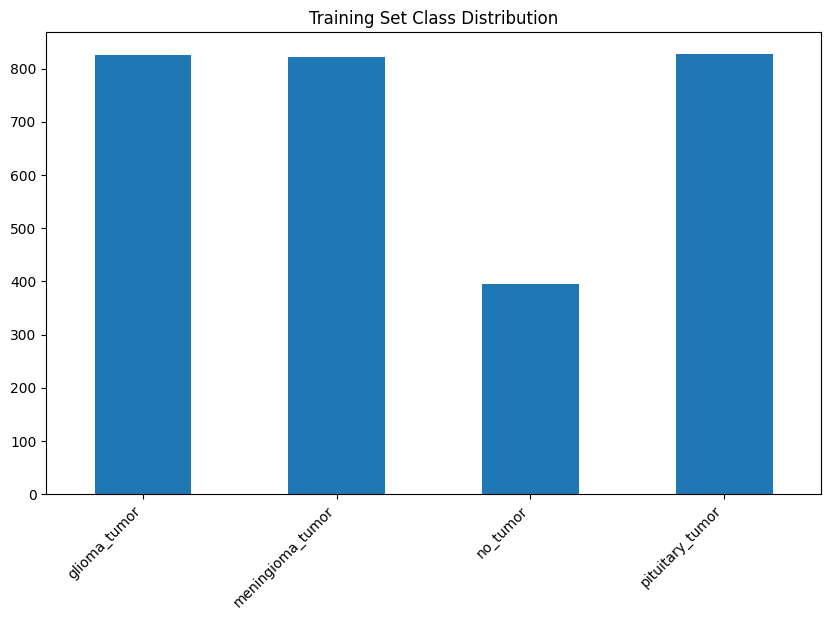

In [58]:
ax = train_categories_df.plot(kind='bar', figsize=(10, 6), legend=False, title='Training Set Class Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

[Text(0, 0, 'glioma_tumor'),
 Text(1, 0, 'meningioma_tumor'),
 Text(2, 0, 'no_tumor'),
 Text(3, 0, 'pituitary_tumor')]

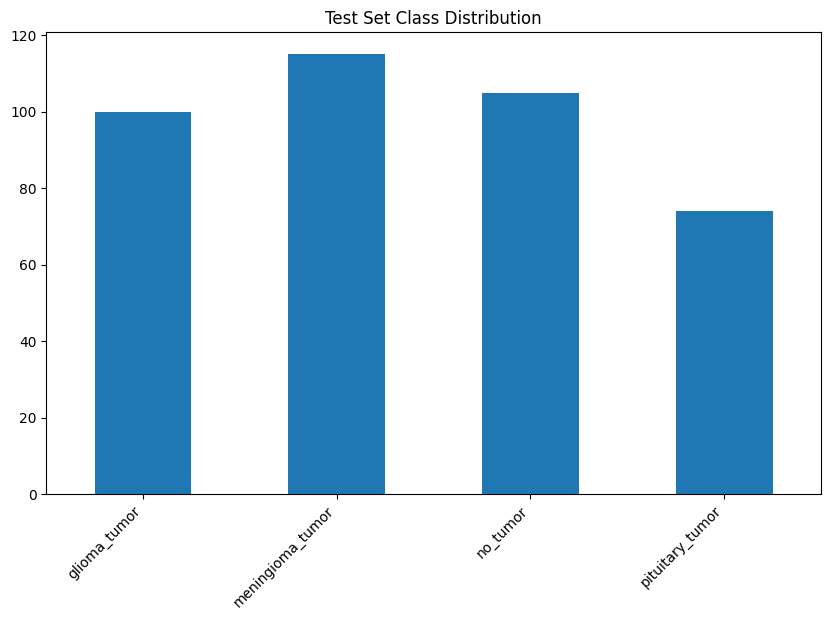

In [61]:
ax = test_categories_df.plot(kind='bar', figsize=(10, 6), legend=False, title='Test Set Class Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

[Text(0, 0, 'glioma_tumor'),
 Text(1, 0, 'meningioma_tumor'),
 Text(2, 0, 'no_tumor'),
 Text(3, 0, 'pituitary_tumor')]

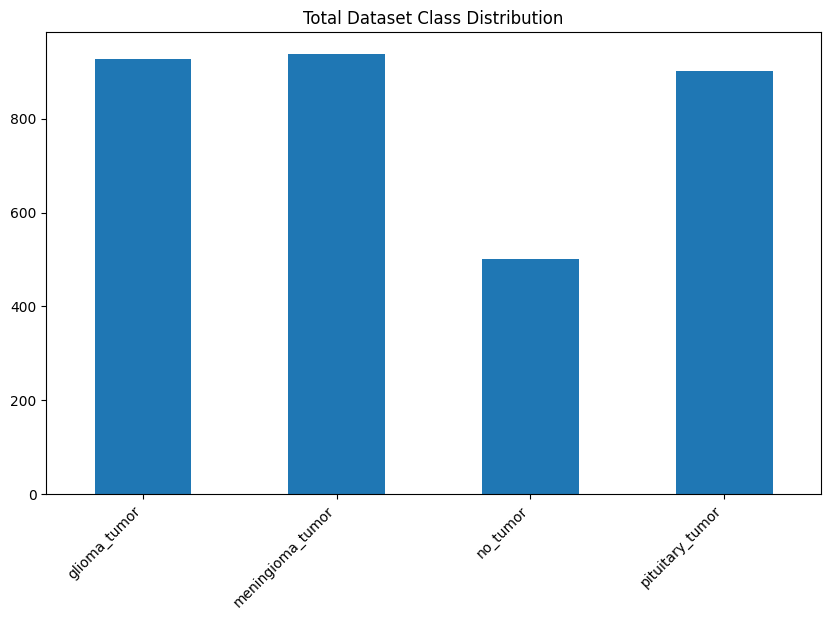

In [62]:
ax = dataset_categories_df.plot(kind='bar', figsize=(10, 6), legend=False, title='Total Dataset Class Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [64]:
train_categories_df

,count
glioma_tumor,826
meningioma_tumor,822
no_tumor,395
pituitary_tumor,827
